![image info](https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/images/banner_1.png)

# Taller: Redes Neuronales

En este taller podrán poner en práctica sus conocimientos sobre la construcción e implementación de redes neuronales de una capa y multicapa. El taller está constituido por 4 puntos, en los cuales deberan seguir las intrucciones de cada numeral para su desarrollo.

## Datos predicción probabilidad de admisión a la universidad

En este taller se usará el conjunto de datos de admisiones a una universidad proveniente de la base de datos de Kaggle. Cada observación contiene la probabilidad de que un estudiante sea admitido por la universidad, dadas distintas variables predictoras como el puntaje del examén TOEFL y GRE, el promedio (GPA), entre otras. El objetivo es predecir la probabilidad de admissión de cada estudiante. Para más detalles pueden visitar el siguiente enlace: [datos](https://www.kaggle.com/mohansacharya/graduate-admissions).

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Importación librerías
import numpy as np
import keras 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from keras import initializers
from keras import optimizers
from keras import activations
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.layers import Dropout
from livelossplot import PlotLossesKeras
from keras.callbacks import EarlyStopping
from keras import optimizers
from keras import backend as K
import keras.optimizers as opts

from keras.callbacks import ModelCheckpoint 
from keras.models import load_model



In [4]:
# Carga de datos de archivo .csv
data = pd.read_csv('https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/datasets/universityGraduateAdmissions.csv', index_col=0)
data.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
Serial No.,,,,,,,,
1,337,118,4,4.5,4.5,9.65,1,0.92
2,324,107,4,4.0,4.5,8.87,1,0.76
3,316,104,3,3.0,3.5,8.00,1,0.72
4,322,110,3,3.5,2.5,8.67,1,0.80
5,314,103,2,2.0,3.0,8.21,0,0.65


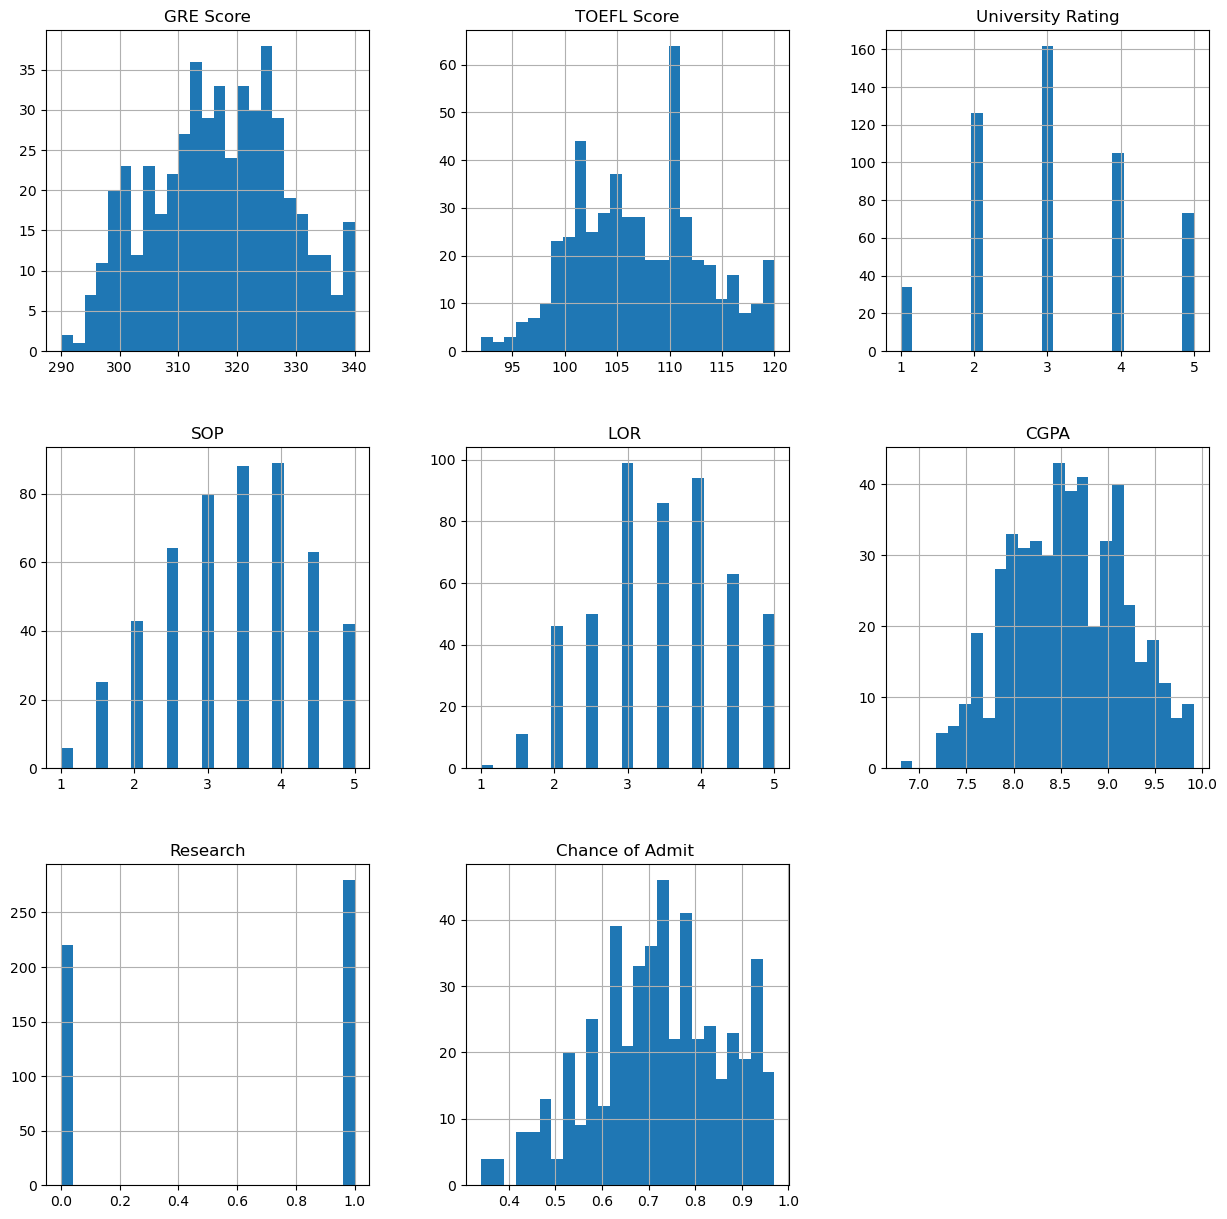

In [5]:
# Hitogramas de las varaibles del dataset
data.hist(bins=25, figsize=(15,15))
plt.show()

In [6]:
# Definición de variables predictoras (X)
X = data.drop(data.columns[-1], axis=1)
# Definición de variable de interés (y)
Y = data[data.columns[-1]]

In [7]:
# Separación de variables predictoras (X) y variable de interés (y) en set de entrenamiento y test usandola función train_test_split
xTrain, xTest, yTrain, yTest = train_test_split(X,Y,test_size=0.3, random_state=22)

Se inicial el proceso con la estandarización de las variables

In [8]:
from sklearn.preprocessing import StandardScaler

# Definición de la función StandardScaler
scaler = StandardScaler()
scaler.fit(X)

# Transformación de los set de entrenamiento y test
xTrain = pd.DataFrame(data=scaler.transform(xTrain), columns=xTrain.columns, index=xTrain.index)
xTest = pd.DataFrame(data=scaler.transform(xTest), columns=xTest.columns, index=xTest.index)

xTrain = np.array(xTrain)
yTrain = np.array(yTrain)

xTest = np.array(xTest)
yTest = np.array(yTest)

Se guardan las dimensiones de las variables para alimentarlas como parametros de la arquitectura de las redes

In [9]:
#Dimensiones de las variables
output_var = 1
print(output_var, ' output variables')
dims = xTrain[0].shape[0]
print(dims, 'input variables')

#Limpiando la sesión de Keras
keras.backend.clear_session()

1  output variables
7 input variables



## Punto 1 - Red Neuronal de una capa

En la celda 1 creen una **red neuronal de una capa** con la librería Keras, que prediga la probabilidad de admisión de los estudiantes, usando los sets de entrenamiento y test definidos anteriormente. Pueden usar la función de perdida, el optimizador y el número de épocas que consideren pertinentes para el modelo, justificando su selección. Finalmente, grafiquen la pérdida del modelo vs el número de épocas en el set de entrenamiento y validación, y presenten el desempeño del modelo con las métricas error absoluto medio (MAE) y error cuadrático medio (MSE).

In [73]:
K.clear_session()
# Definición red neuronal con la función Sequential()
model = Sequential()
# Definición de la capa densa con un tamaño de salida igual a output_var y un input_shape de dims
model.add(Dense(output_var, input_shape=(dims,)))
#model.add(Activation(activations.sigmoid)) #Capa de salida con función de activación sigmoide - tarda muchas epocas en reducir el error

# Impresión de la arquitectura de la red neuronal
print(model.summary())

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 1)              │             8 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8 (32.00 B)

 Trainable params: 8 (32.00 B)

 Non-trainable params: 0 (0.00 B)

None


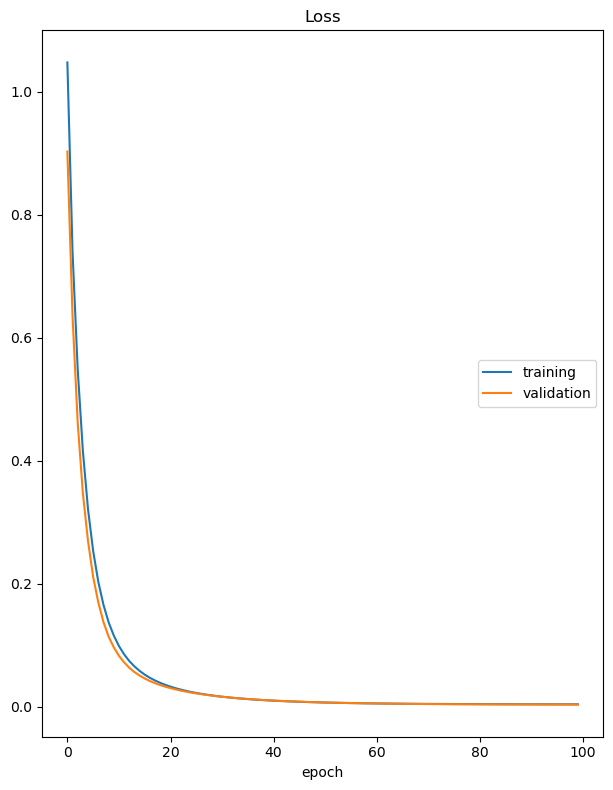

Loss
	training         	 (min:    0.004, max:    1.048, cur:    0.004)
	validation       	 (min:    0.003, max:    0.903, cur:    0.003)
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0040 - val_loss: 0.0034
Valor mínimo de MSE de la red neuronal de una capa: 0.0033918567933142185
Época con el menor MSE: 100


In [38]:
# Celda 1
# Definición de la función de pérdida - MSE
model.compile(optimizer='sgd', loss='mean_squared_error')
# Callback para guardar el modelo con el menor error cuadrático medio
checkpoint = ModelCheckpoint("best_model.keras", monitor='val_loss', verbose=1, save_best_only=True, mode='min')
# Entrenamiento de la red neuronal con 50 épocas
history_1_mse = model.fit(xTrain, yTrain,
                    verbose=1,
                    epochs=100,
                    validation_data=(xTest, yTest),
                    callbacks=[PlotLossesKeras()])

# Obtener el valor mínimo de MSE durante el entrenamiento
RN_1C_MSE = min(history_1_mse.history['val_loss'])
# Imprimir el valor mínimo de MSE
print("Valor mínimo de MSE de la red neuronal de una capa:", RN_1C_MSE)
best_epoch_1_MSE = np.argmin(history_1_mse.history['val_loss']) + 1
print("Época con el menor MSE:", best_epoch_1_MSE)


Luego de entrenar el modelo usando MSE, lo corremos nuevamente pero usando como función de perdida el MAE.

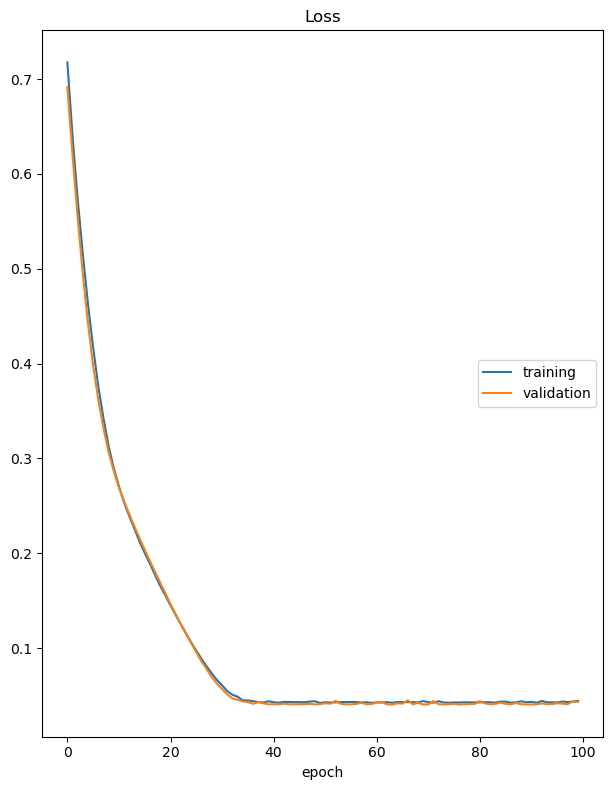

Loss
	training         	 (min:    0.042, max:    0.718, cur:    0.044)
	validation       	 (min:    0.041, max:    0.692, cur:    0.043)
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step - loss: 0.0442 - val_loss: 0.0433
Valor mínimo de MSE de la red neuronal de una capa: 0.04050359129905701
Época con el menor MSE: 77


In [40]:
# Definición de la función de pérdida - MSE
model.compile(optimizer='sgd', loss='mean_absolute_error')
# Callback para guardar el modelo con el menor error cuadrático medio
checkpoint = ModelCheckpoint("best_model.keras", monitor='val_loss', verbose=1, save_best_only=True, mode='min')
# Entrenamiento de la red neuronal con 50 épocas
history_1_mae = model.fit(xTrain, yTrain,
                    verbose=1,
                    epochs=100,
                    validation_data=(xTest, yTest),
                    callbacks=[PlotLossesKeras()])

# Obtener el valor mínimo de MSE durante el entrenamiento
RN_1C_MAE = min(history_1_mae.history['val_loss'])
# Imprimir el valor mínimo de MSE
print("Valor mínimo de MSE de la red neuronal de una capa:", RN_1C_MAE)
best_epoch_1_MAE = np.argmin(history_1_mae.history['val_loss']) + 1
print("Época con el menor MSE:", best_epoch_1_MAE)


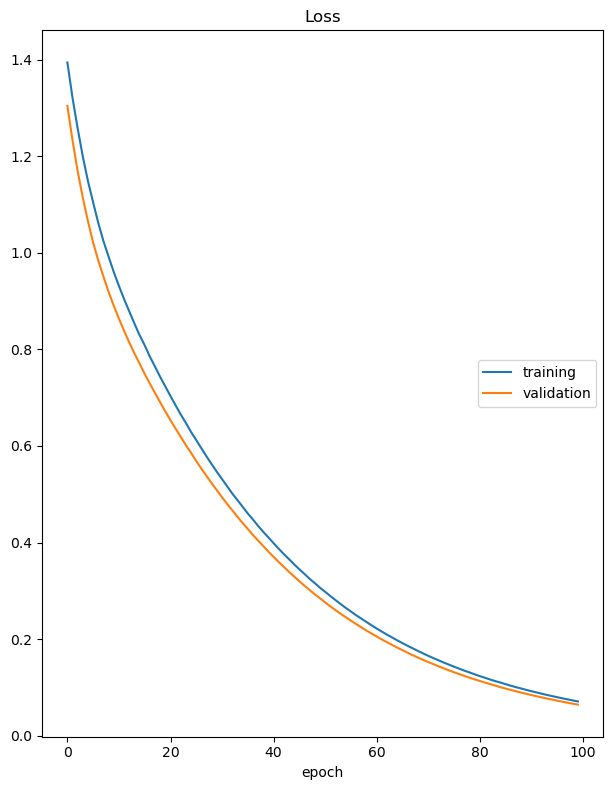

Loss
	training         	 (min:    0.071, max:    1.394, cur:    0.071)
	validation       	 (min:    0.064, max:    1.304, cur:    0.064)
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0745 - val_loss: 0.0643
Valor mínimo de MSE de la red neuronal de una capa: 0.0643039420247078
Época con el menor MSE: 100


In [72]:
# Definición de la función de pérdida - MSE
model.compile(optimizer='adam', loss='mean_squared_error')
# Callback para guardar el modelo con el menor error cuadrático medio
checkpoint = ModelCheckpoint("best_model.keras", monitor='val_loss', verbose=1, save_best_only=True, mode='min')
# Entrenamiento de la red neuronal con 50 épocas
history_1_mse_ADAM = model.fit(xTrain, yTrain,
                    verbose=1,
                    epochs=100,
                    validation_data=(xTest, yTest),
                    callbacks=[PlotLossesKeras()])

# Obtener el valor mínimo de MSE durante el entrenamiento
RN_1C_MSE_adam = min(history_1_mse_ADAM.history['val_loss'])
# Imprimir el valor mínimo de MSE
print("Valor mínimo de MSE de la red neuronal de una capa:", RN_1C_MSE_adam)
best_epoch_1_MSE_ADAM = np.argmin(history_1_mse_ADAM.history['val_loss']) + 1
print("Época con el menor MSE:", best_epoch_1_MSE_ADAM)


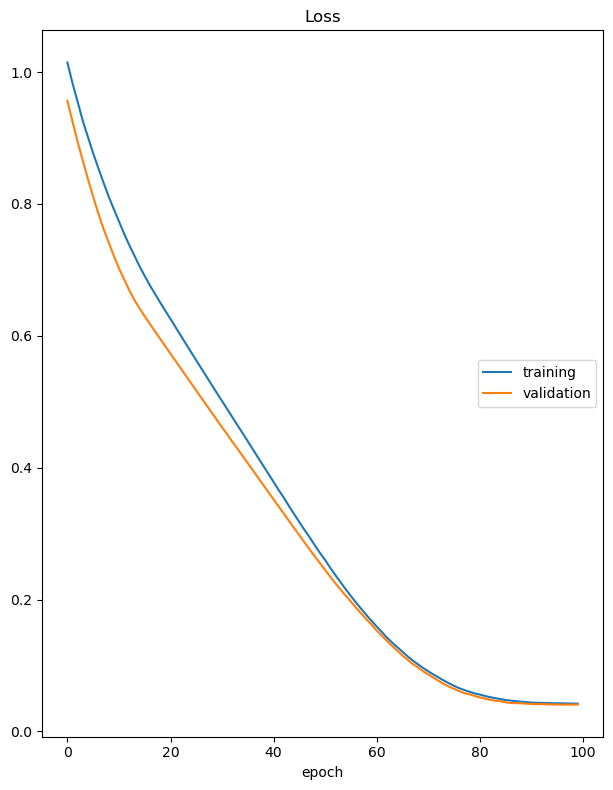

Loss
	training         	 (min:    0.042, max:    1.015, cur:    0.042)
	validation       	 (min:    0.041, max:    0.956, cur:    0.041)
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step - loss: 0.0410 - val_loss: 0.0408
Valor mínimo de MSE de la red neuronal de una capa: 0.04061869904398918
Época con el menor MSE: 98


In [74]:
# Definición de la función de pérdida - MSE
model.compile(optimizer='adam', loss='mean_absolute_error')
# Callback para guardar el modelo con el menor error cuadrático medio
checkpoint = ModelCheckpoint("best_model.keras", monitor='val_loss', verbose=1, save_best_only=True, mode='min')
# Entrenamiento de la red neuronal con 50 épocas
history_1_mae_adam = model.fit(xTrain, yTrain,
                    verbose=1,
                    epochs=100,
                    validation_data=(xTest, yTest),
                    callbacks=[PlotLossesKeras()])

# Obtener el valor mínimo de MSE durante el entrenamiento
RN_1C_MAE_ADAM = min(history_1_mae_adam.history['val_loss'])
# Imprimir el valor mínimo de MSE
print("Valor mínimo de MSE de la red neuronal de una capa:", RN_1C_MAE_ADAM)
best_epoch_1_MAE_adam = np.argmin(history_1_mae_adam.history['val_loss']) + 1
print("Época con el menor MSE:", best_epoch_1_MAE_adam)

Se construye un modelo con 8 neuronas. 7 de la capa de entrada, esto pues la cantidad de neuronas de entrada es quivalente a la cantidad de variables que alimentan el modelo, y una de salida, con una función de activación ReLu. Se realizó la prueba también con una función de activacióin sigmoide (ya que el problema es probabilisticao) y se encontró que el entrenamiento de la red era mas eficiente con la función ReLu (en menos epocas reducía más el error tanto de entrenamiento como de validación).

Se entrenan 100 epocas de calibración pues se hace un primer ejercicio con 50 y se observa que si bien ocurre un punto de codo en el calculo de MAE y MSE al entrenar el modelo, queríamos confirmar si con más epocas habia una mejora continua del error. Esto sucedió al usar la función de perdidas de MSE, pero al usar la función MAE, se encontró un valor mínimo en 35 epocas. 

Se decide usar 100 epocas para todos los modelos para evaluar duración de entrenamiento.

## Punto 2 - Red Neuronal multicapa

En la celda 2 creen una **red neuronal con dos capas** con la librería Keras, que prediga la probabilidad de admisión de los estudiantes usando los sets de entrenamiento y test definidos anteriormente. Pueden usar la función de perdida, el optimizador, el número de épocas y el número de neuronas que consideren pertinentes para el modelo, justificando su selección. Finalmente, grafiquen la pérdida del modelo vs el número de épocas en el set de entrenamiento y validación, y presenten el desempeño del modelo con las métricas error absoluto medio (MAE) y error cuadrático medio (MSE).

Para este caso se decide probar con funciones de activación relu para todas las capas ocultas y también para la capa de salida, pues como lo probamos en el primer punto, toma menor cantidad de epocas de entrenamiento para llegar a un error establemente bajo. Así mismo, se evaluan distintas cantidades de neuronas por capa para revisar las diferencias en desempeño de utilizar mas o menos neuronas.

In [42]:
#Función de calibración de redes con distintos parametros que grafica la evolución del MAE y el MSE
def CalibraRed(xTrain, yTrain, n_neuronas,optimizer_='sgd', loss_='mean_squared_error', activation_ = 'relu', epochs_ = 100, early_stopping_ = False, drop_out_ = False ):
    train_errors = [] # Donde se almacenaran los errores de entrenamiento
    val_errors = [] # Donde se almacenaran los errores de validación

    # Separación de datos de entrenamiento para considerar un set de validación durante entrenamiento
    X_train, X_val, Y_train, Y_val = train_test_split(xTrain, yTrain, test_size=0.15, random_state=42)

    for neurona in n_neuronas:
        K.clear_session()
        model = Sequential()
        model.add(Dense(neurona, input_shape=(dims,), activation=activation_))
        model.add(Dense(neurona, activation = activation_))
        if drop_out_ > 0:
            model.add(Dropout(drop_out_))          

        model.add(Dense(output_var))
        model.add(Activation(activation_))
        model.compile(optimizer=optimizer_, loss=loss_)

        if early_stopping_== True:
            early_stopping = EarlyStopping(monitor='val_loss', patience=4, verbose=1)
            red_neuronal = model.fit(X_train, Y_train, epochs=epochs_, validation_data=(X_val, Y_val), verbose=0, callbacks = [early_stopping])
        else:
            red_neuronal = model.fit(X_train, Y_train, epochs=epochs_, validation_data=(X_val, Y_val), verbose=0)
        train_error, val_error = red_neuronal.history['loss'], red_neuronal.history['val_loss']
        train_errors.append(train_error)
        val_errors.append(val_error)

    fig, axes = plt.subplots(2, 1, figsize=(10, 12))
    # Graficar errores de entrenamiento en el primer subplot
    axes[0].set_title('Errores de entrenamiento vs. Número de Neuronas ' + loss_)
    axes[0].set_xlabel('Epoch')
    axes[0].set_ylabel('Error')
    for i, neurona in enumerate(n_neuronas):
        axes[0].plot(train_errors[i], label=f'{neurona} neurons')
    axes[0].legend()
    axes[0].grid(True)

    # Graficar errores de validación en el segundo subplot
    axes[1].set_title('Errores de validación vs. Número de Neuronas ' + loss_)
    axes[1].set_xlabel('Epoch')
    axes[1].set_ylabel('Error')
    for i, neurona in enumerate(n_neuronas):
        axes[1].plot(val_errors[i], label=f'{neurona} neurons')
    axes[1].legend()
    axes[1].grid(True)

    plt.tight_layout()  # Ajustar el espaciado entre subplots
    plt.show()

    return train_errors, val_errors


Se prueban distintas cantidades de neuronas para la capa intermedia, evaluando errores de validación y entrenamiento, usando funciones MAE y MSE, para un optimizador de SGD.

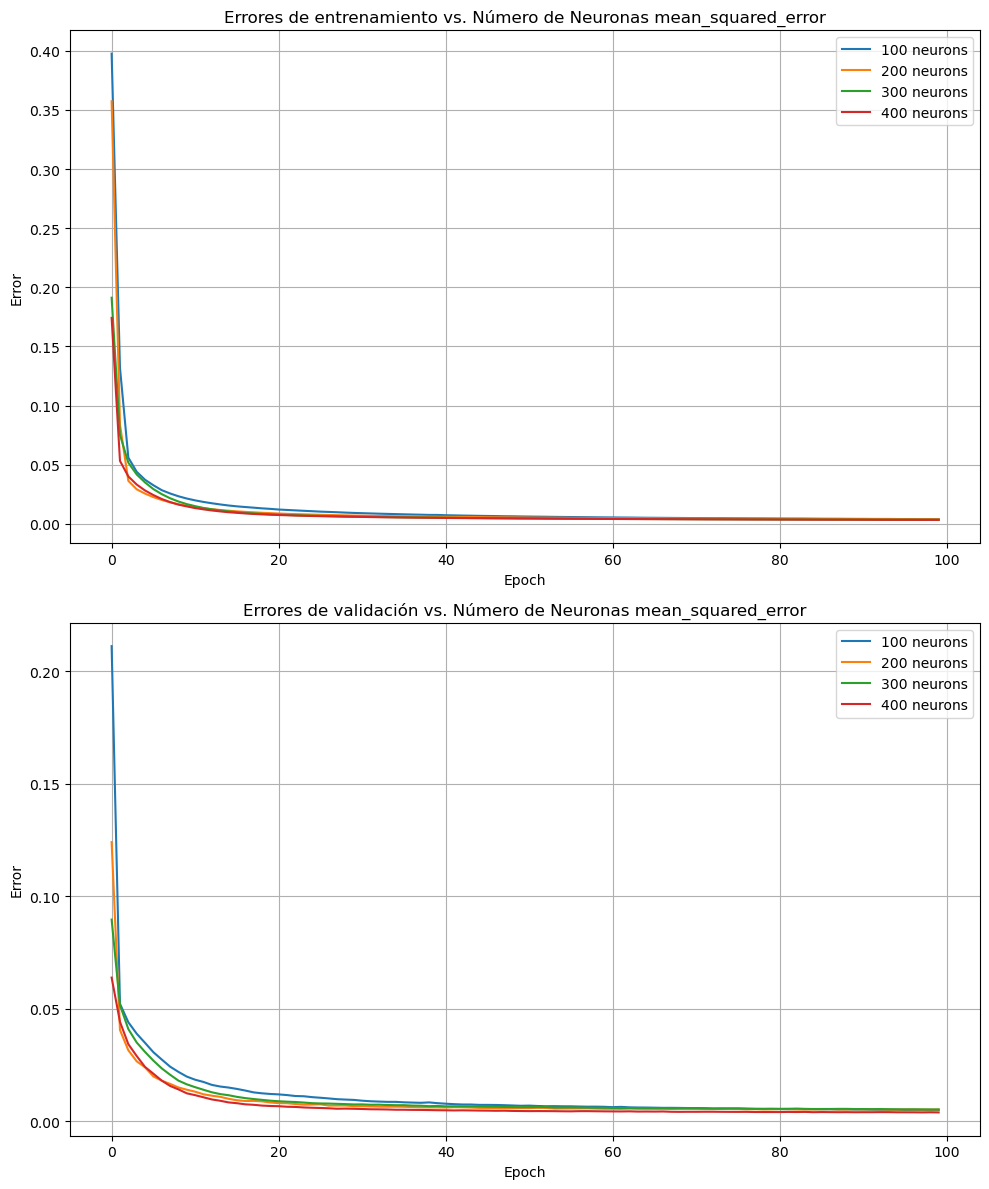

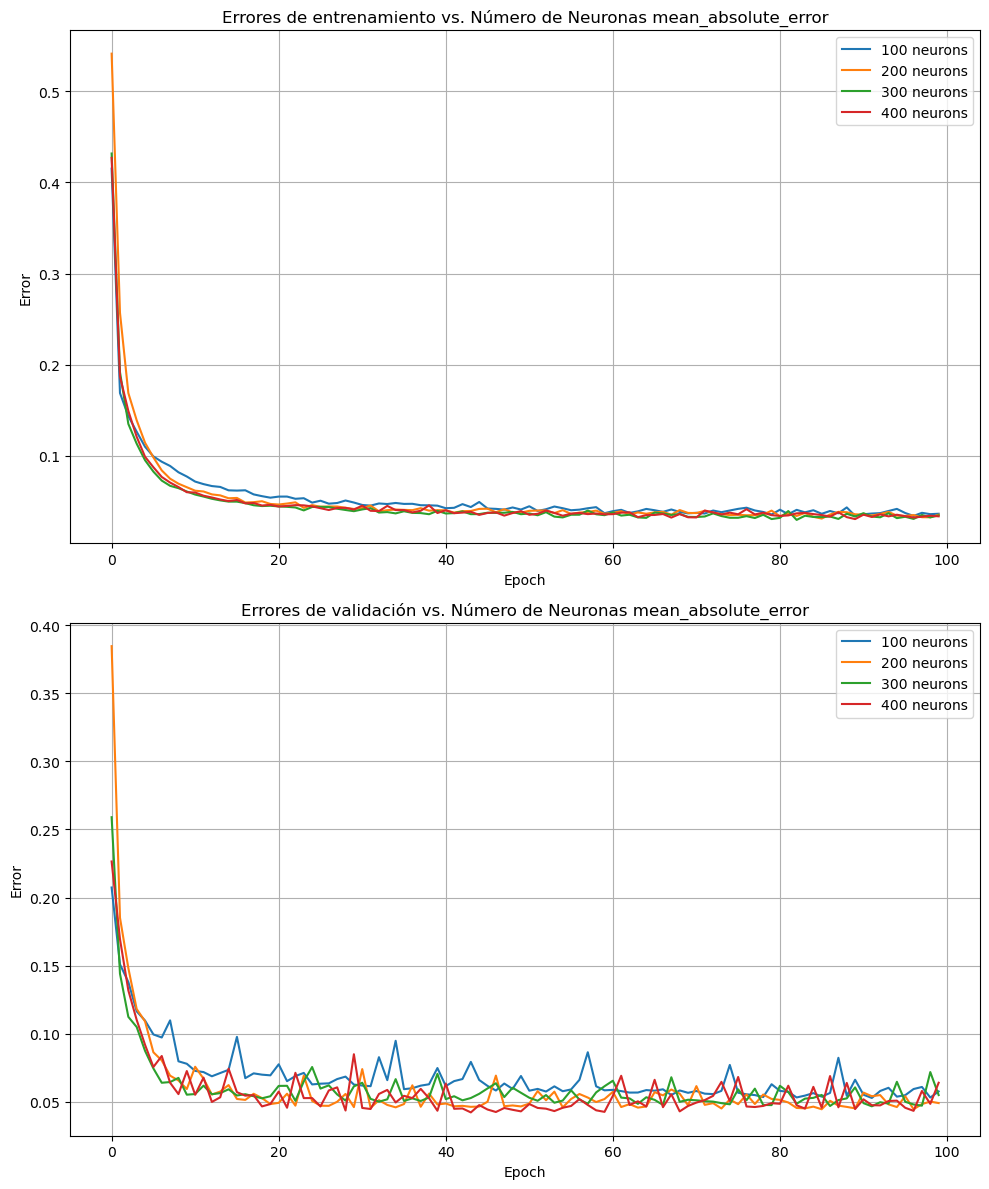

In [69]:
#Se prueban distintas cantidades de neuronas
n_neuronas = [100,200,300,400]  # Números de neuronas a probar
#Se prueba con distintas funciones de perdida:

train_errrors_MSE, train_errrors_MSE = CalibraRed(xTrain,yTrain, n_neuronas=n_neuronas)
train_errrors_MAE, train_errrors_MAE = CalibraRed(xTrain,yTrain,loss_='mean_absolute_error', n_neuronas=n_neuronas)

Para el caso de uso de MSE como función de perdida, vemos que en las primeras epocas de validación hay un desempeño ligeramente mayor de los modelos con mayor cantidad de neuronas (300-400), sin embargo despues de alrededor de la epoca 40 las diferencias son minimas tanto para el error de validación como para el error de entenamiento.

Por su parte, para el caso de las pruebas usando MAE se observa una mejor reducción mantenida en validación de el modelo con 400 neuronas. 

Debido a que este caso nuestros datos no son tan grances y los modelos por epoca se están entrenando relativamente rapido (entre 50 ms y 100 ms), decidimos utilizar la mayor cantidad probada de 400 neuronas. Para otros casos podría disminuirse esta cantidad de neuronas si el trabajo de entrenamiento del modelo fuera más complejo (mayor cantidad de variables de entrada y de observaciones).


Se prueban distintas cantidades de neuronas para la capa intermedia, evaluando errores de validación y entrenamiento, usando funciones MAE y MSE, para un optimizador 
adam.

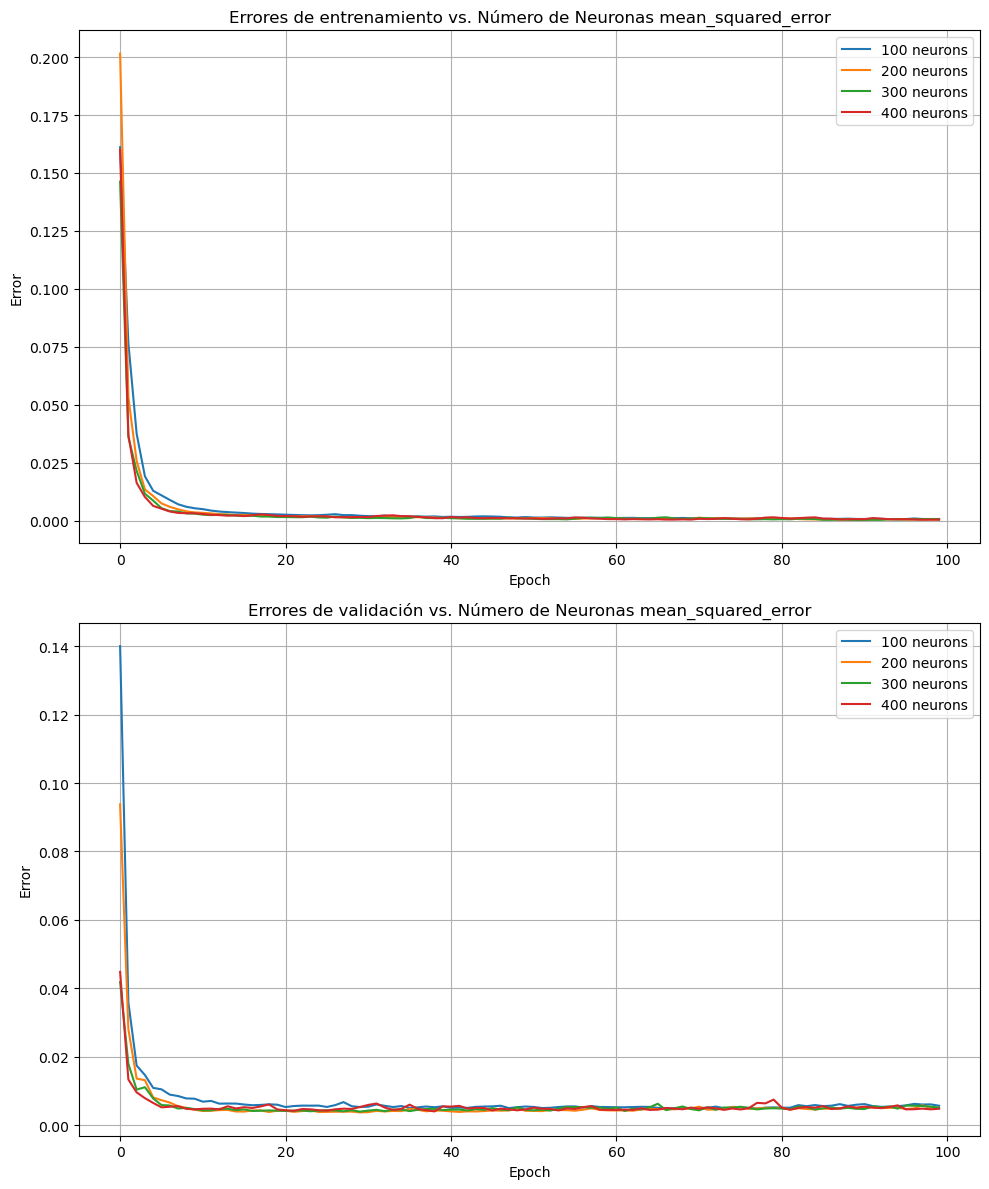

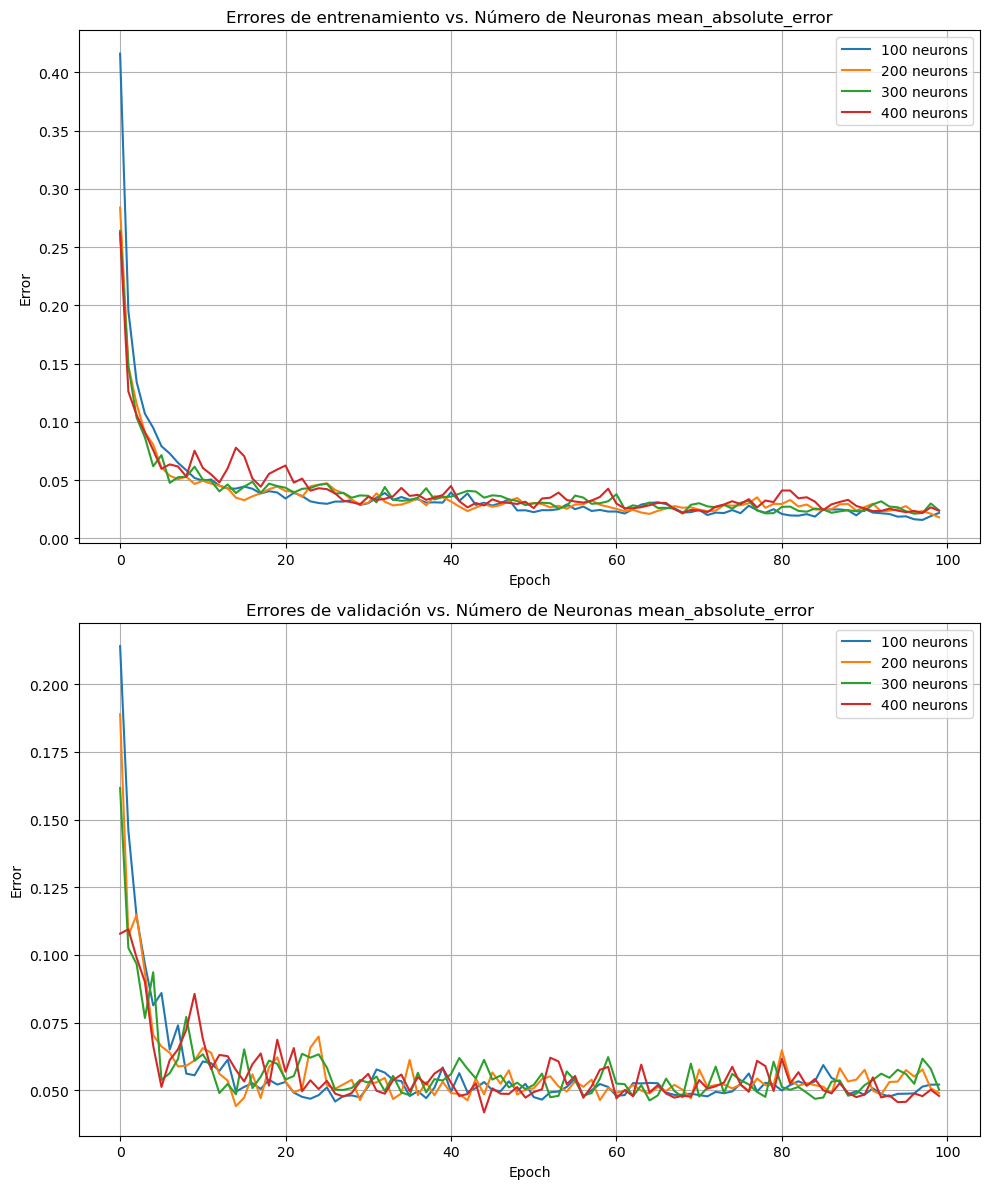

In [76]:
#Se prueban distintas cantidades de neuronas
n_neuronas = [100,200,300,400]  # Números de neuronas a probar
#Se prueba con distintas funciones de perdida:

train_errrors_MSE, train_errrors_MSE = CalibraRed(xTrain,yTrain, n_neuronas=n_neuronas, optimizer_='adam')
train_errrors_MAE, train_errrors_MAE = CalibraRed(xTrain,yTrain,loss_='mean_absolute_error', n_neuronas=n_neuronas, optimizer_='adam')

Se realiza el entrenamiento del modelo con 400 neuronas en la capa intermedia y un optimizador tipo SGD.

In [50]:
# Celda 2
K.clear_session()
model2 = Sequential()
# Definición de la capa densa con un tamaño de salida igual a output_var y un input_shape de dims
model2.add(Dense(400, input_shape=(dims,), activation= 'relu')) 
model2.add(Dense(400, activation='relu'))  #Segunda capa con 400 neuronas y función de activación relu
model2.add(Dense(output_var))
model2.add(Activation('relu')) #Capa de salida con función de activación sigmoide

# Impresión de la arquitectura de la red neuronal
print(model2.summary())

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 400)            │         3,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 400)            │       160,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │           401 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 1)              │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 164,001 (640.63 KB)

 Trainable params: 164,001 (640.63 KB)

 Non-trainable params: 0 (0.00 B)

None


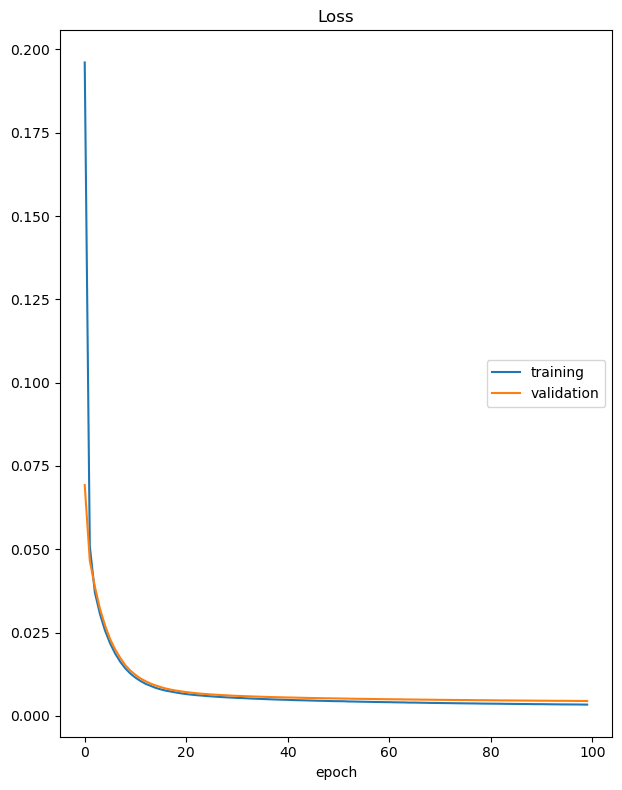

Loss
	training         	 (min:    0.003, max:    0.196, cur:    0.003)
	validation       	 (min:    0.004, max:    0.069, cur:    0.004)
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0033 - val_loss: 0.0045
Valor mínimo de MSE de la red neuronal de dos capa: 0.004468885250389576
Época con el menor MSE: 100


In [44]:
model2.compile(optimizer='sgd', loss='mean_squared_error')
# Callback para guardar el modelo con el menor error cuadrático medio
checkpoint = ModelCheckpoint("best_model.keras", monitor='val_loss', verbose=1, save_best_only=True, mode='min')
# Entrenamiento de la red neuronal con 100 épocas
history_2_mse = model2.fit(xTrain, yTrain,
                    verbose=1,
                    epochs=100,
                    validation_data=(xTest, yTest),
                    callbacks=[PlotLossesKeras()])

# Obtener el valor mínimo de MSE durante el entrenamiento
RN_2C_MSE = min(history_2_mse.history['val_loss'])
# Imprimir el valor mínimo de MSE
print("Valor mínimo de MSE de la red neuronal de dos capa:", RN_2C_MSE)
best_epoch_2_MSE = np.argmin(history_2_mse.history['val_loss']) + 1
print("Época con el menor MSE:", best_epoch_2_MSE)

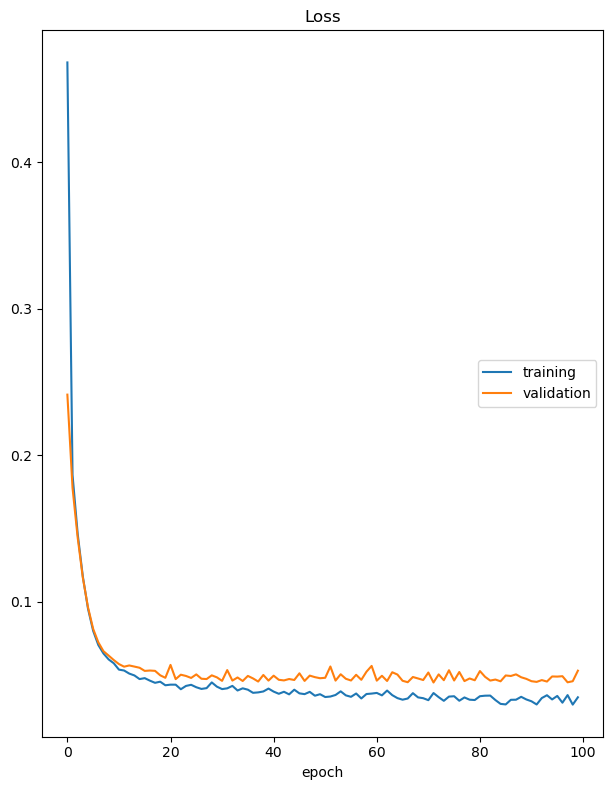

Loss
	training         	 (min:    0.030, max:    0.468, cur:    0.035)
	validation       	 (min:    0.045, max:    0.241, cur:    0.053)
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0309 - val_loss: 0.0531
Valor mínimo de MAE de la red neuronal de dos capa: 0.04507678002119064
Época con el menor MAE: 72


In [47]:
model2.compile(optimizer='sgd', loss='mean_absolute_error')

# Entrenamiento de la red neuronal con 100 épocas
history_2_mae = model2.fit(xTrain, yTrain,
                    verbose=1,
                    epochs=100,
                    validation_data=(xTest, yTest),
                    callbacks=[PlotLossesKeras()])

# Obtener el valor mínimo de MSE durante el entrenamiento
RN_2C_MAE = min(history_2_mae.history['val_loss'])
# Imprimir el valor mínimo de MSE
print("Valor mínimo de MAE de la red neuronal de dos capa:", RN_2C_MAE)
best_epoch_2_MAE = np.argmin(history_2_mae.history['val_loss']) + 1
print("Época con el menor MAE:", best_epoch_2_MAE)

Se realiza el entrenamiento del modelo con 400 neuronas en la capa intermedia y un optimizador tipo ADAM.

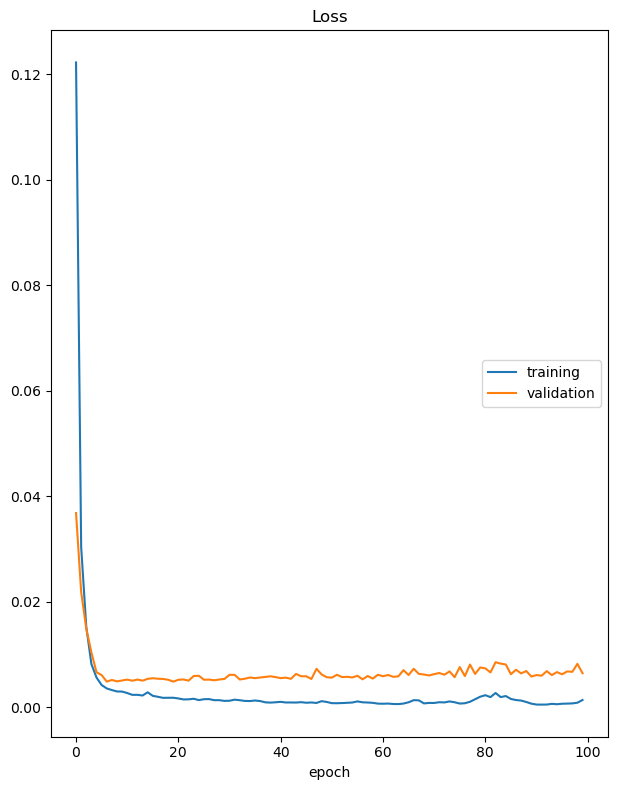

Loss
	training         	 (min:    0.001, max:    0.122, cur:    0.001)
	validation       	 (min:    0.005, max:    0.037, cur:    0.006)
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - loss: 0.0013 - val_loss: 0.0065
Valor mínimo de MSE de la red neuronal de dos capa optimizador ADAM: 0.004865823779255152
Época con el menor MSE: 20


In [49]:
model2.compile(optimizer='adam', loss='mean_squared_error')
# Callback para guardar el modelo con el menor error cuadrático medio
checkpoint = ModelCheckpoint("best_model.keras", monitor='val_loss', verbose=1, save_best_only=True, mode='min')
# Entrenamiento de la red neuronal con 100 épocas
history_2_mse_adam = model2.fit(xTrain, yTrain,
                    verbose=1,
                    epochs=100,
                    validation_data=(xTest, yTest),
                    callbacks=[PlotLossesKeras()])

# Obtener el valor mínimo de MSE durante el entrenamiento
RN_2C_MSE_ADAM = min(history_2_mse_adam.history['val_loss'])
# Imprimir el valor mínimo de MSE
print("Valor mínimo de MSE de la red neuronal de dos capa optimizador ADAM:", RN_2C_MSE_ADAM)
best_epoch_2_MSE_adam = np.argmin(history_2_mse_adam.history['val_loss']) + 1
print("Época con el menor MSE:", best_epoch_2_MSE_adam)

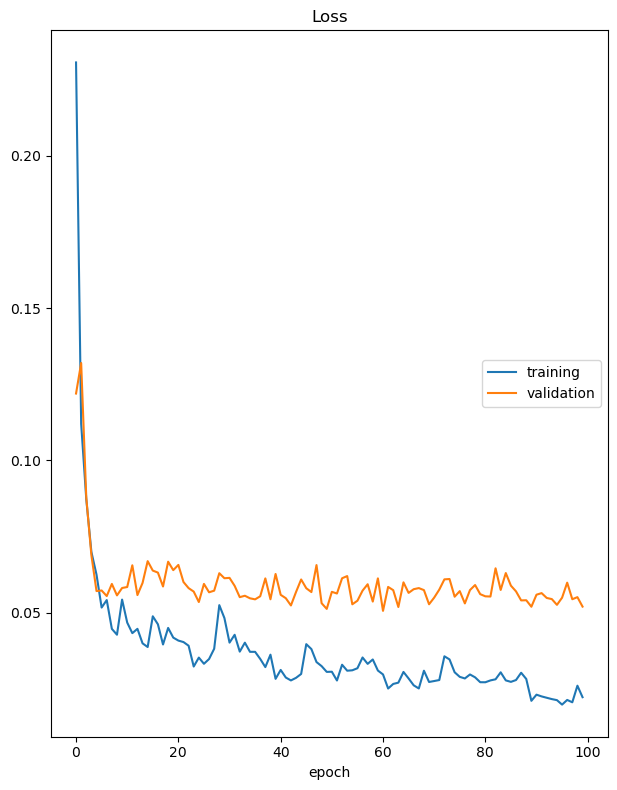

Loss
	training         	 (min:    0.020, max:    0.231, cur:    0.022)
	validation       	 (min:    0.051, max:    0.132, cur:    0.052)
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step - loss: 0.0224 - val_loss: 0.0520
Valor mínimo de MAE de la red neuronal de dos capa: 0.050604116171598434
Época con el menor MAE: 61


In [51]:
model2.compile(optimizer='adam', loss='mean_absolute_error')

# Entrenamiento de la red neuronal con 50 épocas
history_2_mae_adam = model2.fit(xTrain, yTrain,
                    verbose=1,
                    epochs=100,
                    validation_data=(xTest, yTest),
                    callbacks=[PlotLossesKeras()])

# Obtener el valor mínimo de MSE durante el entrenamiento
RN_2C_MAE_ADAM = min(history_2_mae_adam.history['val_loss'])
# Imprimir el valor mínimo de MSE
print("Valor mínimo de MAE de la red neuronal de dos capa:", RN_2C_MAE_ADAM)
best_epoch_2_MAE_adam = np.argmin(history_2_mae_adam.history['val_loss']) + 1
print("Época con el menor MAE:", best_epoch_2_MAE_adam)

## Punto 3  - Red Neuronal multicapa

En la celda 3 creen **una red neuronal con más de una capa con la librería Keras, usando early stopping y dropout,** que prediga la probabilidad de admisión de los estudiantes con los sets de entrenamiento y test definidos anteriormente. Pueden usar la función de perdida, el optimizador, el número de épocas y el número de neuronas que consideren pertinentes para el modelo, justificando su selección. Finalmente, grafiquen la pérdida del modelo vs el número de épocas en el set de entrenamiento y validación, y presenten el desempeño del modelo con las métricas error absoluto medio (MAE) y error cuadrático medio (MSE).

Se inicia por testear en 50 epocas dos tipos de optimizador (adam, sgd), para dos funciones de perdida diferentes (MSE y MAE), utilizando un early stoping con paciencia de 4 periodos para umento de error en validación y un dropout del 20 % de la capa intermedia. 


-------------------------------------
Resultados para optimizador tipo SGD
Epoch 48: early stopping


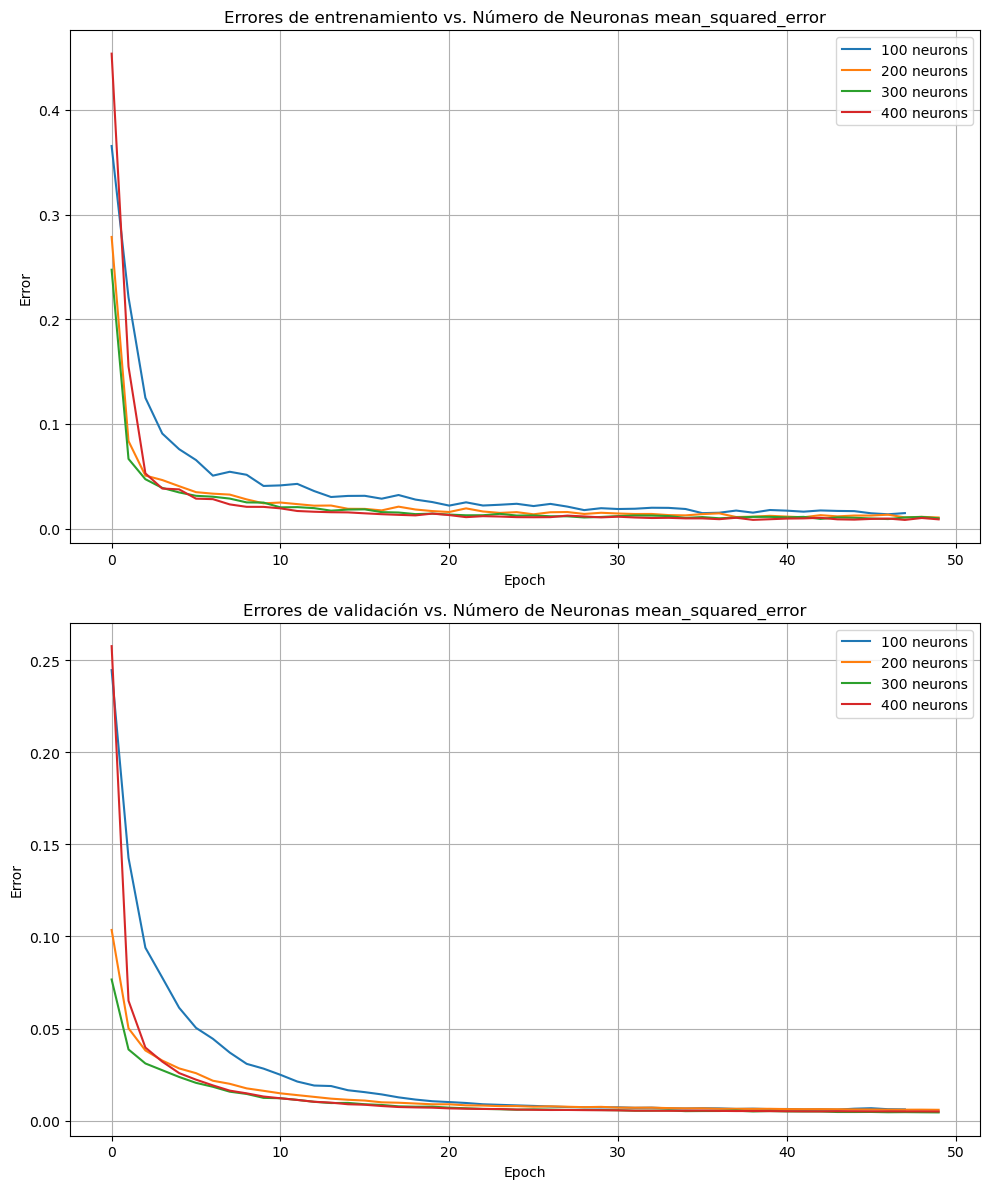

Epoch 39: early stopping
Epoch 22: early stopping
Epoch 30: early stopping
Epoch 15: early stopping


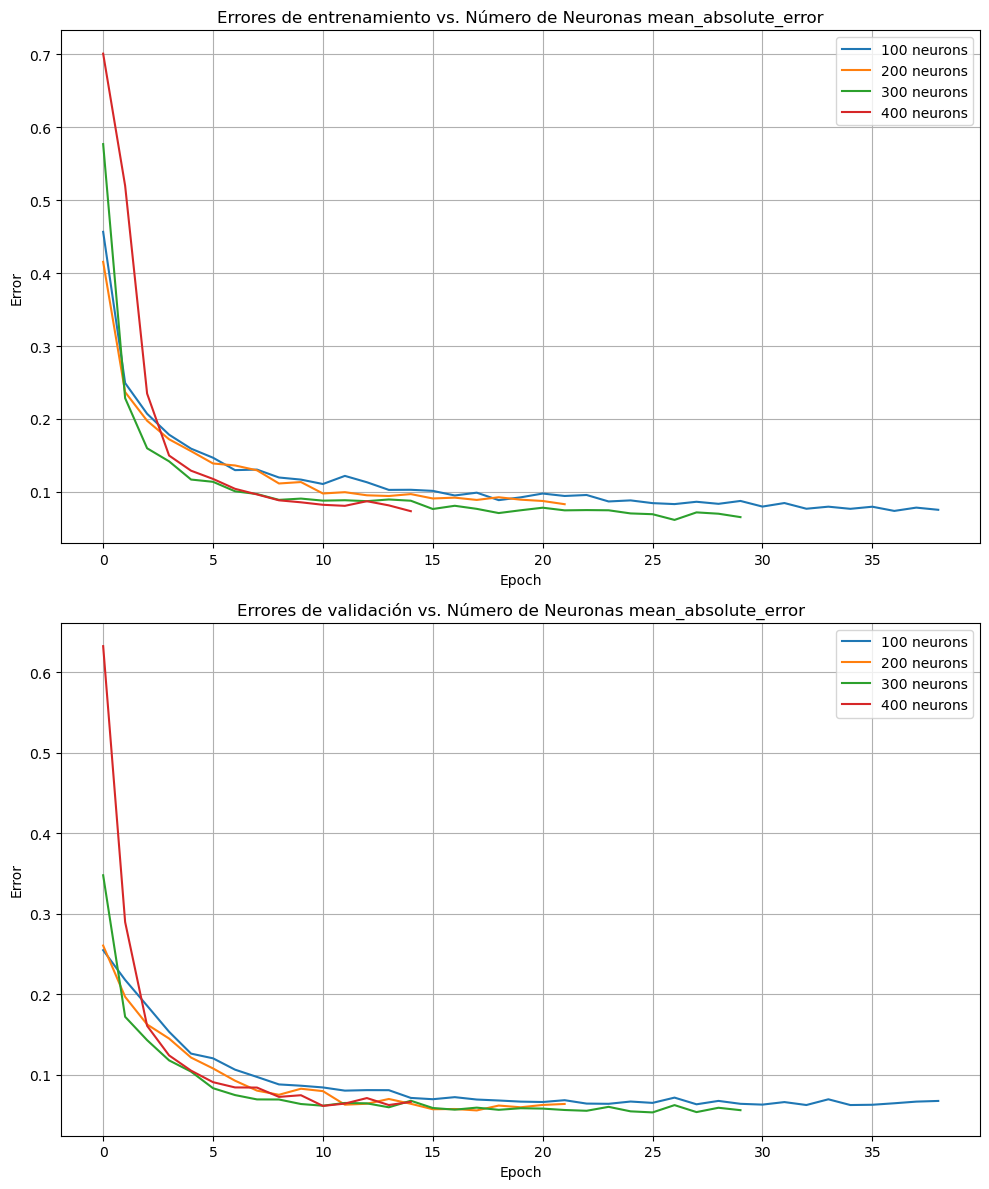


-------------------------------------
Resultados para optimizador tipo ADAM
Epoch 19: early stopping
Epoch 20: early stopping
Epoch 18: early stopping
Epoch 15: early stopping


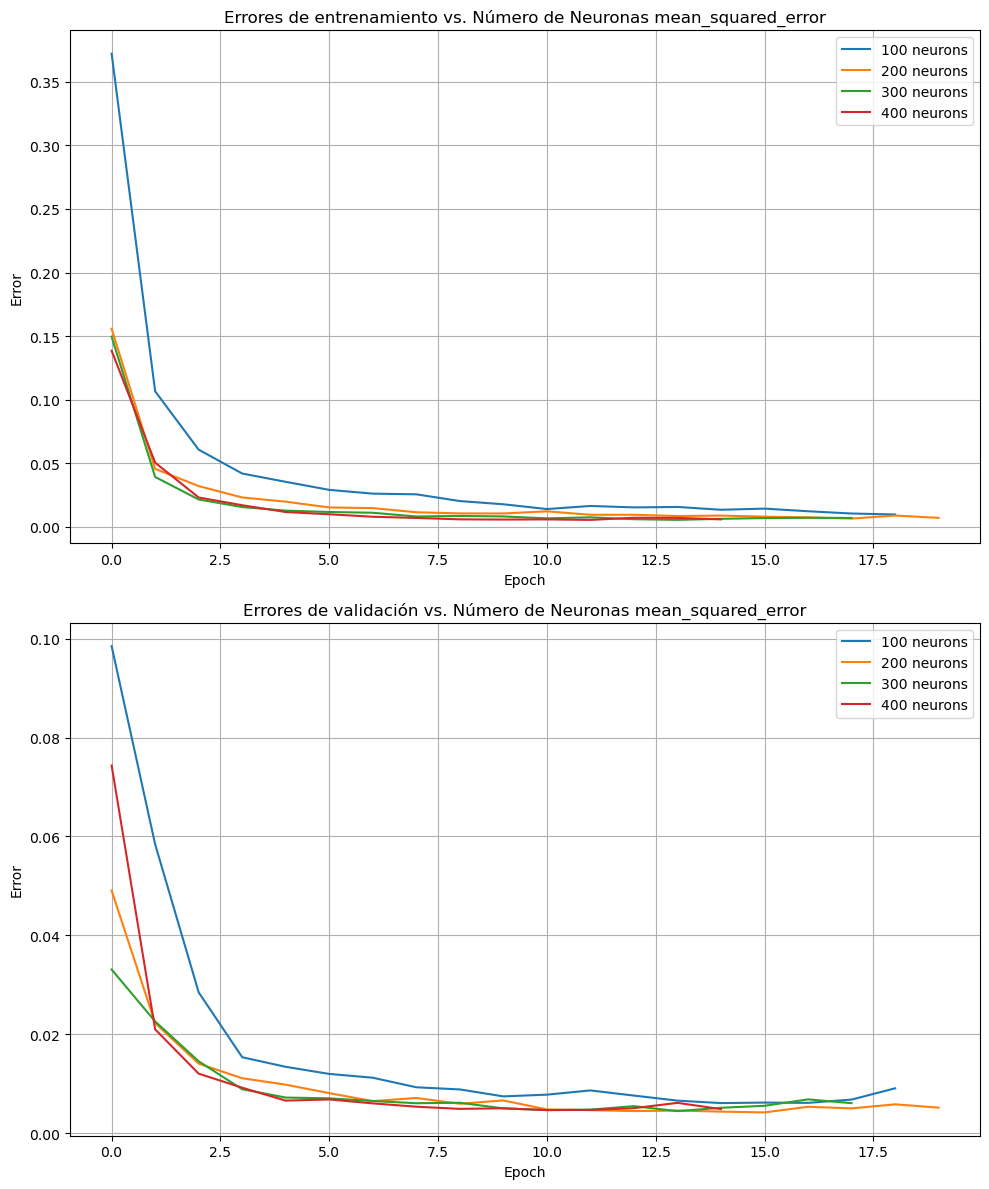

Epoch 27: early stopping
Epoch 14: early stopping
Epoch 17: early stopping
Epoch 22: early stopping


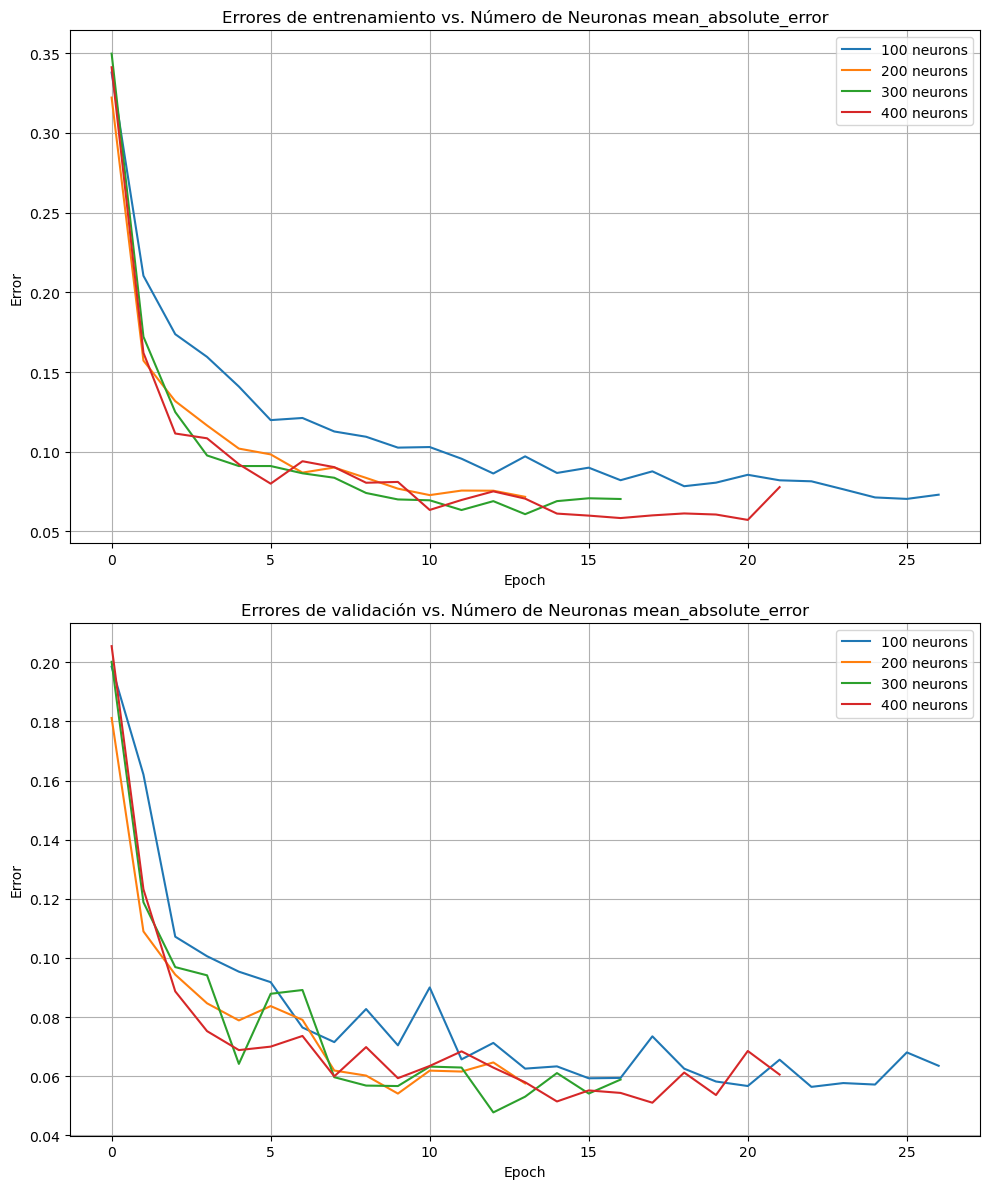

([[0.33792614936828613,
   0.21041125059127808,
   0.1737472265958786,
   0.1595090627670288,
   0.1408972144126892,
   0.11983940750360489,
   0.12117694318294525,
   0.11269912868738174,
   0.10939756780862808,
   0.1025739535689354,
   0.10293639451265335,
   0.09561455994844437,
   0.08633825927972794,
   0.09709726274013519,
   0.08668387681245804,
   0.08999542146921158,
   0.08212460577487946,
   0.0876842737197876,
   0.07835935056209564,
   0.08059190958738327,
   0.08552540838718414,
   0.08207035809755325,
   0.08144086599349976,
   0.07644293457269669,
   0.07132069766521454,
   0.07039975374937057,
   0.07303805649280548],
  [0.32222554087638855,
   0.1571832299232483,
   0.13174238801002502,
   0.11647988110780716,
   0.10196316987276077,
   0.09832710772752762,
   0.0868929997086525,
   0.09009479731321335,
   0.083574578166008,
   0.07684054970741272,
   0.07278092205524445,
   0.07562686502933502,
   0.07554491609334946,
   0.07169979065656662],
  [0.3497864305973053,


In [21]:
#Se prueban distintas cantidades de neuronas
n_neuronas = [100,200,300,400]  # Números de neuronas a probar
#Se prueba con distintas funciones de perdida:
print("\n-------------------------------------")
print("Resultados para optimizador tipo SGD")
CalibraRed(xTrain,yTrain, epochs_= 50 , n_neuronas=n_neuronas, optimizer_='sgd', early_stopping_=True, drop_out_= 0.2)
CalibraRed(xTrain,yTrain, epochs_= 50 ,loss_='mean_absolute_error', n_neuronas=n_neuronas, optimizer_='sgd', early_stopping_=True, drop_out_= 0.2)
print("\n-------------------------------------")
print("Resultados para optimizador tipo ADAM")

CalibraRed(xTrain,yTrain, epochs_= 50 ,n_neuronas=n_neuronas, optimizer_='adam', early_stopping_=True, drop_out_= 0.2)
CalibraRed(xTrain,yTrain,epochs_= 50 ,loss_='mean_absolute_error', n_neuronas=n_neuronas, optimizer_='adam', early_stopping_=True, drop_out_= 0.2)

Se observa que al implementar el medotod de early stoping (con una paciencia de 4 periodos), para todos los modelos entrenados con MAE, se detiene el modelo mucho antes. Por ejemplo, al utilizar un optimizador tipo ADAM, para 200 neuronas el proceso se deitne a tan solo 14 epocas. Algo similar ocurre si se utiliza el optimizador SGD usando MAE, el proceso se detiene en la epoca 15.

Basado en los resultados anteriores, se realiza el entrenamiento del modelo con 400 neuronas en la capa intermedia, un optimizador tipo SGD, con droput de 20% de neuronas en la capa intermedia y early stoping con paciencia de 4 para encontrar el mejor modelo.

In [58]:
K.clear_session()
model3 = Sequential()
# Definición de la capa densa con un tamaño de salida igual a output_var y un input_shape de dims
model3.add(Dense(400, input_shape=(dims,), activation= 'relu')) 
model3.add(Dense(400, activation='relu'))  #Segunda capa con 400 neuronas y función de activación relu
model3.add(Dropout(0.2)) #Droput del 20%
model3.add(Dense(output_var))
model3.add(Activation('relu')) #Capa de salida con función de activación sigmoide

# Impresión de la arquitectura de la red neuronal
print(model3.summary())

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 400)            │         3,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 400)            │       160,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 400)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │           401 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 1)              │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 164,001 (640.63 KB)

 Trainable params: 164,001 (640.63 KB)

 Non-trainable params: 0 (0.00 B)

None


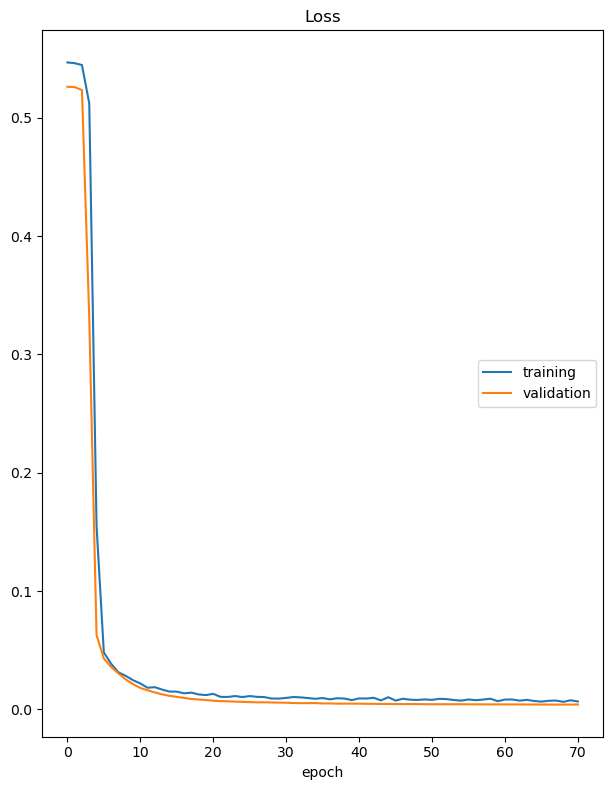

Loss
	training         	 (min:    0.006, max:    0.547, cur:    0.007)
	validation       	 (min:    0.004, max:    0.526, cur:    0.004)
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 65ms/step - loss: 0.0073 - val_loss: 0.0041
Epoch 71: early stopping
Valor mínimo de MSE de la red neuronal de dos capa: 0.004031337331980467
Época con el menor MSE: 68


In [53]:
model3.compile(optimizer='sgd', loss='mean_squared_error')

#Se adiciona earlt stoping
early_stopping = EarlyStopping(monitor='val_loss', patience=3, verbose=1)
# Entrenamiento de la red neuronal con 50 épocas
history_3_mse = model3.fit(xTrain, yTrain,
                    verbose=1,
                    epochs=100,
                    validation_data=(xTest, yTest),
                    callbacks=[PlotLossesKeras(),early_stopping])

# Obtener el valor mínimo de MSE durante el entrenamiento
RN_2C_MSE_ESD = min(history_3_mse.history['val_loss'])
# Imprimir el valor mínimo de MSE
print("Valor mínimo de MSE de la red neuronal de dos capa:", RN_2C_MSE_ESD)
best_epoch_2_MSE_ESD = np.argmin(history_3_mse.history['val_loss']) + 1
print("Época con el menor MSE:", best_epoch_2_MSE_ESD)

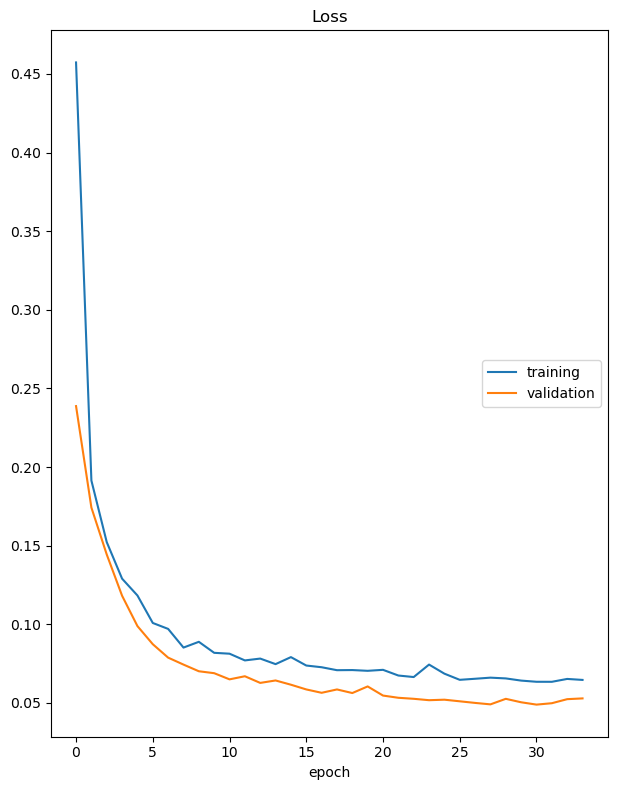

Loss
	training         	 (min:    0.063, max:    0.457, cur:    0.065)
	validation       	 (min:    0.049, max:    0.239, cur:    0.053)
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step - loss: 0.0638 - val_loss: 0.0529
Epoch 34: early stopping
Valor mínimo de MSE de la red neuronal de dos capa: 0.04896354675292969
Época con el menor MSE: 31


In [55]:
model3.compile(optimizer='sgd', loss='mean_absolute_error')
#Se adiciona earlt stoping
early_stopping = EarlyStopping(monitor='val_loss', patience=3, verbose=1)
# Entrenamiento de la red neuronal con 50 épocas
history_3_mae = model3.fit(xTrain, yTrain,
                    verbose=1,
                    epochs=100,
                    validation_data=(xTest, yTest),
                    callbacks=[PlotLossesKeras(),early_stopping])

# Obtener el valor mínimo de MSE durante el entrenamiento
RN_2C_MAE_ESD = min(history_3_mae.history['val_loss'])
# Imprimir el valor mínimo de MSE
print("Valor mínimo de MSE de la red neuronal de dos capa:", RN_2C_MAE_ESD)
best_epoch_2_MAE_ESD = np.argmin(history_3_mae.history['val_loss']) + 1
print("Época con el menor MSE:", best_epoch_2_MAE_ESD)

Basado en los resultados anteriores, se realiza el entrenamiento del modelo con 400 neuronas en la capa intermedia, un optimizador tipo ADAM, con droput de 20% de neuronas en la capa intermedia y early stoping con paciencia de 4 para encontrar el mejor modelo.

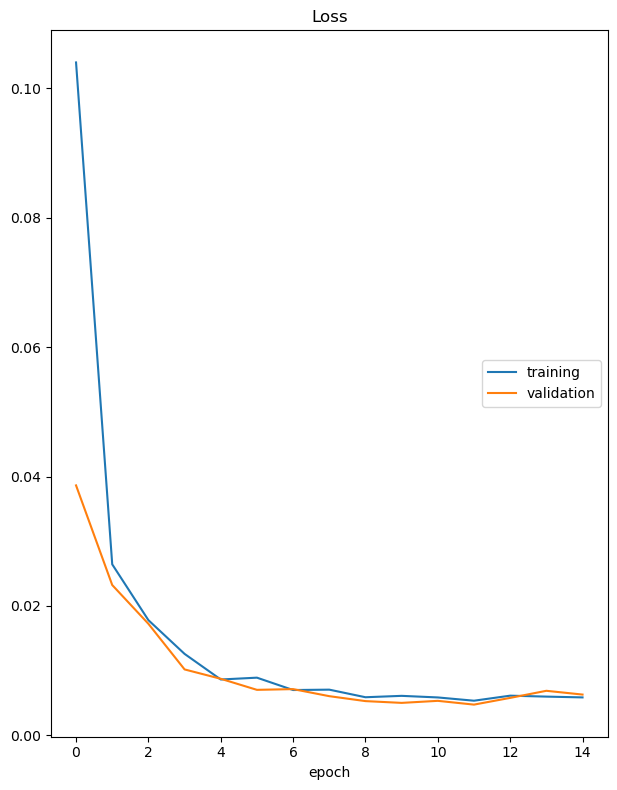

Loss
	training         	 (min:    0.005, max:    0.104, cur:    0.006)
	validation       	 (min:    0.005, max:    0.039, cur:    0.006)
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 0.0057 - val_loss: 0.0063
Epoch 15: early stopping
Valor mínimo de MSE de la red neuronal de dos capa: 0.004754249006509781
Época con el menor MSE: 12


In [57]:
model3.compile(optimizer='adam', loss='mean_squared_error')

#Se adiciona earlt stoping
early_stopping = EarlyStopping(monitor='val_loss', patience=3, verbose=1)
# Entrenamiento de la red neuronal con 50 épocas
history_3_mse_ADAM = model3.fit(xTrain, yTrain,
                    verbose=1,
                    epochs=100,
                    validation_data=(xTest, yTest),
                    callbacks=[PlotLossesKeras(),early_stopping])

# Obtener el valor mínimo de MSE durante el entrenamiento
RN_2C_MSE_ESD_ADAM = min(history_3_mse_ADAM.history['val_loss'])
# Imprimir el valor mínimo de MSE
print("Valor mínimo de MSE de la red neuronal de dos capa:", RN_2C_MSE_ESD_ADAM)
best_epoch_2_MSE_ESD_ADAM = np.argmin(history_3_mse_ADAM.history['val_loss']) + 1
print("Época con el menor MSE:", best_epoch_2_MSE_ESD_ADAM)

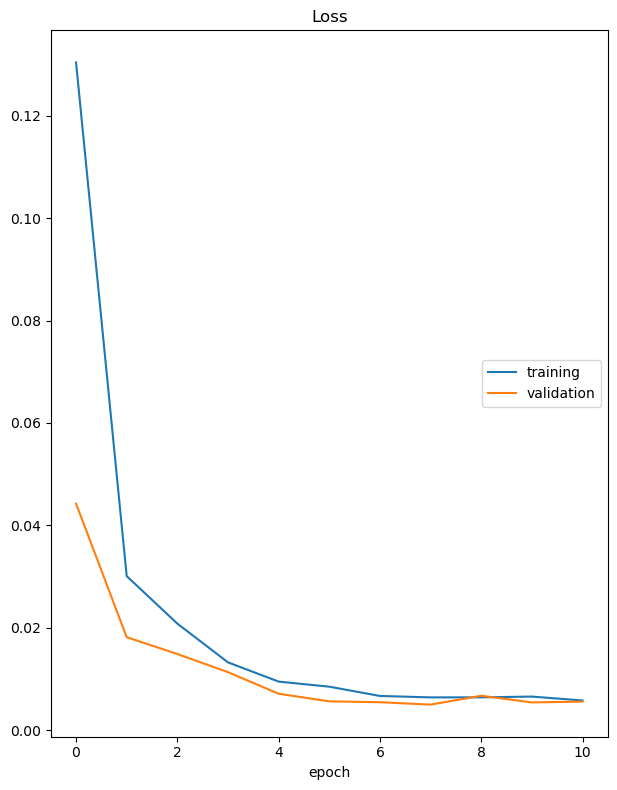

Loss
	training         	 (min:    0.006, max:    0.130, cur:    0.006)
	validation       	 (min:    0.005, max:    0.044, cur:    0.006)
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 0.0063 - val_loss: 0.0056
Epoch 11: early stopping
Valor mínimo de MSE de la red neuronal de dos capa: 0.0049765268340706825
Época con el menor MSE: 8


In [59]:
model3.compile(optimizer='adam', loss='mean_squared_error')

#Se adiciona earlt stoping
early_stopping = EarlyStopping(monitor='val_loss', patience=3, verbose=1)
# Entrenamiento de la red neuronal con 50 épocas
history_3_mae_ADAM = model3.fit(xTrain, yTrain,
                    verbose=1,
                    epochs=100,
                    validation_data=(xTest, yTest),
                    callbacks=[PlotLossesKeras(),early_stopping])

# Obtener el valor mínimo de MSE durante el entrenamiento
RN_2C_MAE_ESD_ADAM = min(history_3_mae_ADAM.history['val_loss'])
# Imprimir el valor mínimo de MSE
print("Valor mínimo de MSE de la red neuronal de dos capa:", RN_2C_MAE_ESD_ADAM)
best_epoch_2_MAE_ESD_ADAM = np.argmin(history_3_mae_ADAM.history['val_loss']) + 1
print("Época con el menor MSE:", best_epoch_2_MAE_ESD_ADAM)

## Punto 4 - Comparación y análisis de resultados

En la celda 4 comparen los resultados obtenidos de las diferentes redes y comenten las ventajas del mejor modelo y las desventajas del modelo con el menor desempeño.

A continuación se presenta la comparación de los diferentes modelos entrenados en 100 epocas. Para compararlos se toma el valor minimo alcanzado en datos de validación en el proceso de entrenamiento. También se separa el análisis dependiendo de el tipo de función de perdida (MSE vs MAE) y el tipo de optimizador (SGD - ADAM).

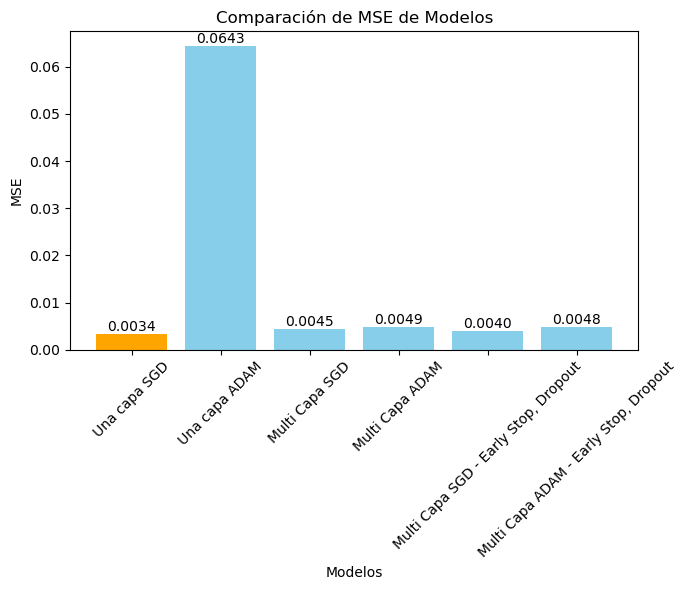

In [75]:
# Celda 4
import matplotlib.pyplot as plt
# Nombres de los modelos y sus accuracies
modelos = ['Una capa SGD', 'Una capa ADAM' ,'Multi Capa SGD', 'Multi Capa ADAM', 'Multi Capa SGD - Early Stop, Dropout','Multi Capa ADAM - Early Stop, Dropout']
MSE = [RN_1C_MSE,RN_1C_MSE_adam, RN_2C_MSE, RN_2C_MSE_ADAM,RN_2C_MSE_ESD,RN_2C_MSE_ESD_ADAM]
# Encontrar el índice del accuracy más alto
indice_min = MSE.index(min(MSE))
# Crear el gráfico de barras
plt.figure(figsize=(7, 6))
plt.bar(modelos, MSE, color=['skyblue' if i != indice_min else 'orange' for i in range(len(modelos))])
# Etiquetar los valores de accuracy en las barras
for i in range(len(modelos)):
    plt.text(i, MSE[i], f'{MSE[i]:.4f}', ha='center', va='bottom')
plt.title('Comparación de MSE de Modelos')
plt.xlabel('Modelos')
plt.ylabel('MSE')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


En cuanto a los modelos entrenados utilizando MSE como función de perdida, encontramos que el menor error de validación lo alcanza una red neuronal de una sola capa entrenada en 100 epocas, seguido de un modelo multicapa con 400 neuronas con early stoping y dropout. Si bien esto parece algo inesperado es posible que la naturaleza del prolema no requiera modelos tan complejos para dar con una solución optima. Puede que los modelos multicapa, al entrenarse con MSE se esten sobreajustando a los datos de entrenamiento y no encuentren un minimo como el del modelo base. Habría que evaluar aumentar el % de dropout o reducr la cantidad de neuronas para llegar a un optimo.

En todo caso, por simplicidad y por recursos invertidos para entrenar el modelo, para este caso una red de una sola capa resultaría darnos el resultado más optimo.

Ahora, al analizar la velocidad de entrenamiento de los modelos, se encuentra que utilizar el optimizador tipo ADAM permite alcanzar niveles más bajos de error en validación en menor cantidad de epocas. Esto se puede apreciar en el hecho de que para todos los modelos multicapa al utilizar este optimizador se alcanzaban los minimos de cada uno en menor cantiad de epocas en comparación a los modelos entrenados con SGD.

Cabe mencionar también que los modelos más sencillos, como los de una sola capa, alcanzaron su maximo global a la última epoca, esto nos lleva a concluir que pueden ser computacionalmente más costosos, al tomar mayor cantidad de tiempo su entrenamiento optimo. 

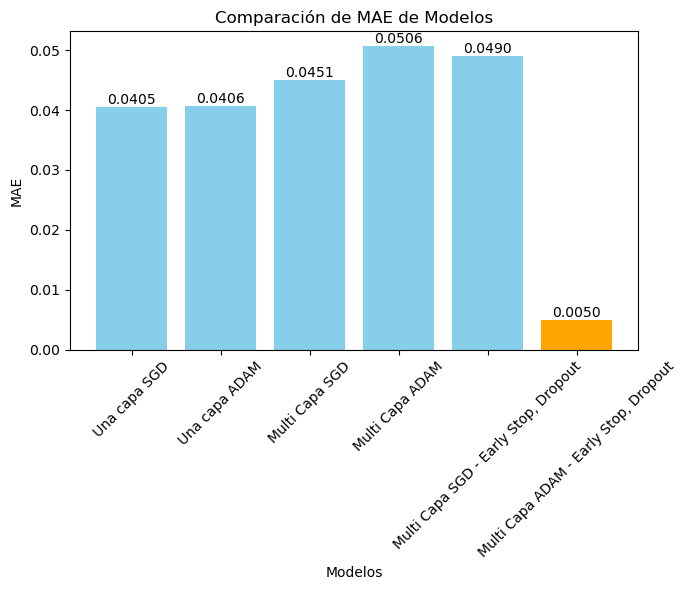

In [76]:
# Celda 5
import matplotlib.pyplot as plt
# Nombres de los modelos y sus accuracies
modelos = ['Una capa SGD','Una capa ADAM', 'Multi Capa SGD', 'Multi Capa ADAM', 'Multi Capa SGD - Early Stop, Dropout','Multi Capa ADAM - Early Stop, Dropout']
MAE = [RN_1C_MAE,RN_1C_MAE_ADAM, RN_2C_MAE, RN_2C_MAE_ADAM,RN_2C_MAE_ESD,RN_2C_MAE_ESD_ADAM]
# Encontrar el índice del accuracy más alto
indice_min = MAE.index(min(MAE))
# Crear el gráfico de barras
plt.figure(figsize=(7, 6))
plt.bar(modelos, MAE, color=['skyblue' if i != indice_min else 'orange' for i in range(len(modelos))])
# Etiquetar los valores de accuracy en las barras
for i in range(len(modelos)):
    plt.text(i, MAE[i], f'{MAE[i]:.4f}', ha='center', va='bottom')
plt.title('Comparación de MAE de Modelos')
plt.xlabel('Modelos')
plt.ylabel('MAE')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Por su parte, al entrenar modelos basandonos en la función de MAE se encuentra que el modelo que minimiza en mayor medida el error de validación es un modelo multicapa entrenado con un optimizador tipo ADAM aplicando dropout del 20% de neuronas y early stoping con paciencia de 4 periodos. Se destca que este modelo es seguido de los modelos más sencillos de una sola capa, los cuales a su vez no demustran grandes diferecias. 

Esto parece indicarnos que las estrategias de reducción de sobreestimación, funcionaron correctamente con los parametros revisados para el entrenamiento de modelos usando MAE.

Por otra parte, es importante mencionar que para todos los modelos entrenados, al utilizarse como función de perdida MAE, se alcanzó un minimo de validación más rapido que al utilizar las funciones de MSE. Por ejemplo, al introducir el criterio de early stoping, los modelos entrenados tanto con el optimizador SGD y ADAM encontraron su minimo y se detuvieron antes.

Finalmente, este ejercicio nos demuestra que los resultados de las redes son altamente sensibles a la calibración de sus parámetros y a la naturaleza del problema, reflejada en la complejidad de la estructura de los datos. Como se demostró en la primera parte del ejercicio, puede que una problema sin una estructura tan compleja de datos, pueda dar resultados optimos entrenando modelos relativamente sencillos. A sí mismo, se debe tener en cuenta la velocidad de entrenamiento de los algoritmos ya que puede existir un tradeoff entre convergencia/precisión y tiempo/epocas de entrenamiento.